In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../DATA/cancer_classification.csv")

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


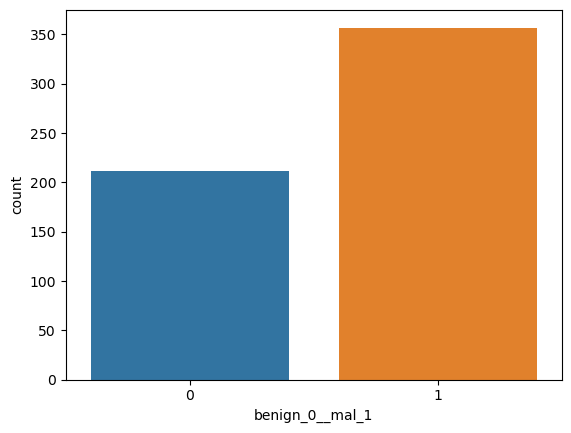

In [8]:
# countplot is relevant for classification cases
sns.countplot(data = df, x = 'benign_0__mal_1')

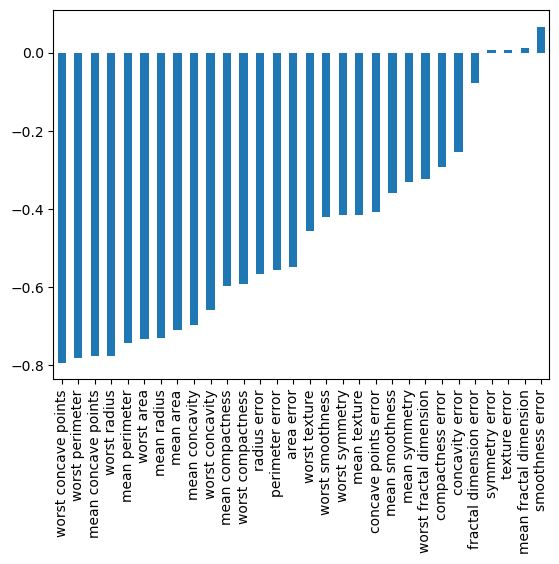

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar') # dropped the classification value itself

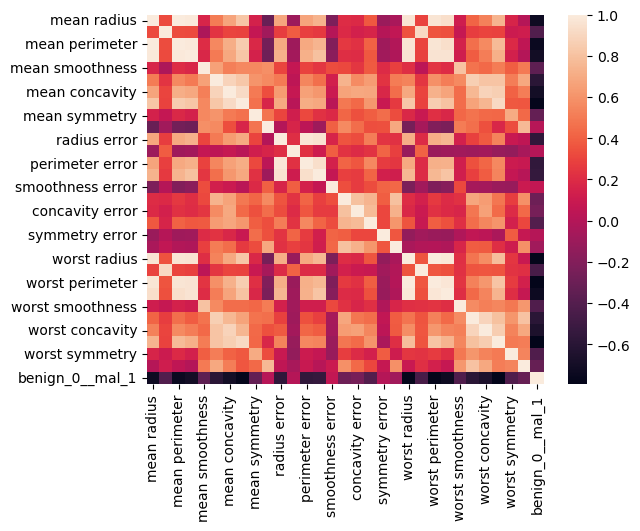

In [15]:
sns.heatmap(df.corr())

## Train Test Split

In [16]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

## Creating the Model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [24]:
X_train.shape

(426, 30)

In [25]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # sigmoid because binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [26]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

2023-06-23 13:36:23.149722: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-23 13:36:23.153032: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6401 - val_loss: 0.6121
Epoch 2/600
426/426 [==============================] - 0s 111us/sample - loss: 0.5848 - val_loss: 0.5659
Epoch 3/600
426/426 [==============================] - 0s 113us/sample - loss: 0.5391 - val_loss: 0.5180
Epoch 4/600
426/426 [==============================] - 0s 104us/sample - loss: 0.4910 - val_loss: 0.4678
Epoch 5/600
426/426 [==============================] - 0s 104us/sample - loss: 0.4434 - val_loss: 0.4181
Epoch 6/600
426/426 [==============================] - 0s 105us/sample - loss: 0.3955 - val_loss: 0.3670
Epoch 7/600
426/426 [==============================] - 0s 100us/sample - loss: 0.3501 - val_loss: 0.3220
Epoch 8/600
426/426 [==============================] - 0s 98us/sample - loss: 0.3138 - val_loss: 0.2863
Epoch 9/600
426/426 [==============================] - 0s 113us/sample - loss: 0.2845 - val_loss: 0.2588
Epoch 10/600

426/426 [==============================] - 0s 97us/sample - loss: 0.0528 - val_loss: 0.1311
Epoch 79/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0540 - val_loss: 0.1225
Epoch 80/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0503 - val_loss: 0.1247
Epoch 81/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0515 - val_loss: 0.1209
Epoch 82/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0481 - val_loss: 0.1308
Epoch 83/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0484 - val_loss: 0.1287
Epoch 84/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0479 - val_loss: 0.1247
Epoch 85/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0506 - val_loss: 0.1226
Epoch 86/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0513 - val_loss: 0.1336
Epoch 87/600
426/426 [==============================] - 0s 94us/sa

426/426 [==============================] - 0s 118us/sample - loss: 0.0328 - val_loss: 0.1355
Epoch 156/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0364 - val_loss: 0.1451
Epoch 157/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0313 - val_loss: 0.1329
Epoch 158/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0334 - val_loss: 0.1471
Epoch 159/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0317 - val_loss: 0.1394
Epoch 160/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0312 - val_loss: 0.1329
Epoch 161/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0309 - val_loss: 0.1428
Epoch 162/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0305 - val_loss: 0.1460
Epoch 163/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0300 - val_loss: 0.1408
Epoch 164/600
426/426 [============================

Epoch 232/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0214 - val_loss: 0.1480
Epoch 233/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0209 - val_loss: 0.1533
Epoch 234/600
426/426 [==============================] - 0s 125us/sample - loss: 0.0207 - val_loss: 0.1513
Epoch 235/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0199 - val_loss: 0.1491
Epoch 236/600
426/426 [==============================] - 0s 198us/sample - loss: 0.0195 - val_loss: 0.1467
Epoch 237/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0215 - val_loss: 0.1584
Epoch 238/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0200 - val_loss: 0.1510
Epoch 239/600
426/426 [==============================] - 0s 107us/sample - loss: 0.0195 - val_loss: 0.1603
Epoch 240/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0221 - val_loss: 0.1408
Epoch 241/600
426/426 [===============

Epoch 309/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0142 - val_loss: 0.1606
Epoch 310/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0141 - val_loss: 0.1663
Epoch 311/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0129 - val_loss: 0.1763
Epoch 312/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0131 - val_loss: 0.1758
Epoch 313/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0131 - val_loss: 0.1713
Epoch 314/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0128 - val_loss: 0.1719
Epoch 315/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0133 - val_loss: 0.1736
Epoch 316/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0135 - val_loss: 0.1678
Epoch 317/600
426/426 [==============================] - 0s 95us/sample - loss: 0.0143 - val_loss: 0.1921
Epoch 318/600
426/426 [=======================

426/426 [==============================] - 0s 98us/sample - loss: 0.0084 - val_loss: 0.1928
Epoch 387/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0091 - val_loss: 0.1943
Epoch 388/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0088 - val_loss: 0.2029
Epoch 389/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0095 - val_loss: 0.2004
Epoch 390/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0091 - val_loss: 0.2095
Epoch 391/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0101 - val_loss: 0.1774
Epoch 392/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0111 - val_loss: 0.2466
Epoch 393/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0121 - val_loss: 0.1727
Epoch 394/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0093 - val_loss: 0.2435
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 98us/sample - loss: 0.0054 - val_loss: 0.2293
Epoch 464/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0053 - val_loss: 0.2306
Epoch 465/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0061 - val_loss: 0.2413
Epoch 466/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0056 - val_loss: 0.2189
Epoch 467/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0067 - val_loss: 0.2385
Epoch 468/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0055 - val_loss: 0.2349
Epoch 469/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0052 - val_loss: 0.2407
Epoch 470/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0055 - val_loss: 0.2355
Epoch 471/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0050 - val_loss: 0.2415
Epoch 472/600
426/426 [==============================] 

426/426 [==============================] - 0s 99us/sample - loss: 0.0043 - val_loss: 0.2985
Epoch 541/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0034 - val_loss: 0.2927
Epoch 542/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0035 - val_loss: 0.3034
Epoch 543/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0037 - val_loss: 0.3124
Epoch 544/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0034 - val_loss: 0.3040
Epoch 545/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0032 - val_loss: 0.3098
Epoch 546/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0064 - val_loss: 0.2751
Epoch 547/600
426/426 [==============================] - 0s 104us/sample - loss: 0.0127 - val_loss: 0.3336
Epoch 548/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0053 - val_loss: 0.2968
Epoch 549/600
426/426 [==============================] - 0

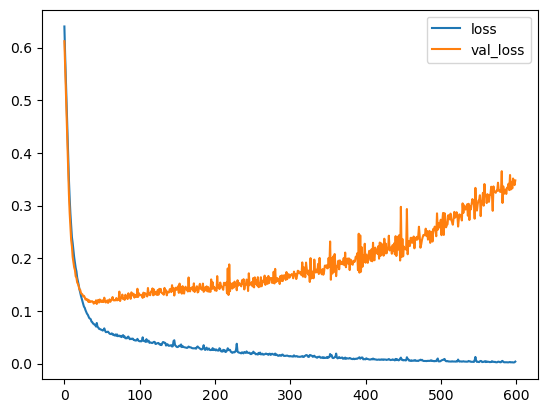

In [27]:
losses = pd.DataFrame(model.history.history)
losses.plot()

As you can see, this is an example of overfitting.

## Early Stopping

In [28]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # sigmoid because binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [31]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [34]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [35]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6796 - val_loss: 0.6548
Epoch 2/600
426/426 [==============================] - 0s 107us/sample - loss: 0.6383 - val_loss: 0.6164
Epoch 3/600
426/426 [==============================] - 0s 111us/sample - loss: 0.5973 - val_loss: 0.5757
Epoch 4/600
426/426 [==============================] - 0s 109us/sample - loss: 0.5522 - val_loss: 0.5247
Epoch 5/600
426/426 [==============================] - 0s 103us/sample - loss: 0.5007 - val_loss: 0.4700
Epoch 6/600
426/426 [==============================] - 0s 104us/sample - loss: 0.4481 - val_loss: 0.4138
Epoch 7/600
426/426 [==============================] - 0s 120us/sample - loss: 0.3968 - val_loss: 0.3630
Epoch 8/600
426/426 [==============================] - 0s 105us/sample - loss: 0.3514 - val_loss: 0.3204
Epoch 9/600
426/426 [==============================] - 0s 106us/sample - loss: 0.3157 - val_loss: 0.2861
Epoch 10/60

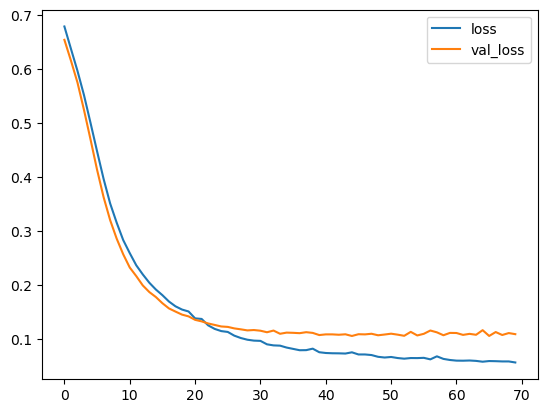

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Though the val_loss is still higher than loss in this case, the fact that it is flattening out is good. We DONT want val_loss to keep increasing after a certain number of epochs because that would indicate overfitting.

## Dropout Layers

Helps prevent overfitting by randomly cancelling neurons in specfic layers

In [40]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(15, activation = 'relu'))
model.add(Dropout(rate = 0.5))

model.add(Dense(1, activation = 'sigmoid')) # sigmoid because binary classification

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [41]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [42]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7271 - val_loss: 0.6924
Epoch 2/600
426/426 [==============================] - 0s 119us/sample - loss: 0.7039 - val_loss: 0.6780
Epoch 3/600
426/426 [==============================] - 0s 116us/sample - loss: 0.6877 - val_loss: 0.6687
Epoch 4/600
426/426 [==============================] - 0s 113us/sample - loss: 0.6711 - val_loss: 0.6569
Epoch 5/600
426/426 [==============================] - 0s 126us/sample - loss: 0.6620 - val_loss: 0.6456
Epoch 6/600
426/426 [==============================] - 0s 110us/sample - loss: 0.6480 - val_loss: 0.6362
Epoch 7/600
426/426 [==============================] - 0s 116us/sample - loss: 0.6481 - val_loss: 0.6173
Epoch 8/600
426/426 [==============================] - 0s 115us/sample - loss: 0.6248 - val_loss: 0.5941
Epoch 9/600
426/426 [==============================] - 0s 114us/sample - loss: 0.6152 - val_loss: 0.5750
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 118us/sample - loss: 0.1095 - val_loss: 0.0931
Epoch 79/600
426/426 [==============================] - 0s 120us/sample - loss: 0.1338 - val_loss: 0.0893
Epoch 80/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1173 - val_loss: 0.1054
Epoch 81/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1262 - val_loss: 0.0992
Epoch 82/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1204 - val_loss: 0.0935
Epoch 83/600
426/426 [==============================] - 0s 122us/sample - loss: 0.1146 - val_loss: 0.0921
Epoch 84/600
426/426 [==============================] - 0s 108us/sample - loss: 0.1208 - val_loss: 0.0938
Epoch 85/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1178 - val_loss: 0.0994
Epoch 86/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1006 - val_loss: 0.1044
Epoch 87/600
426/426 [========================

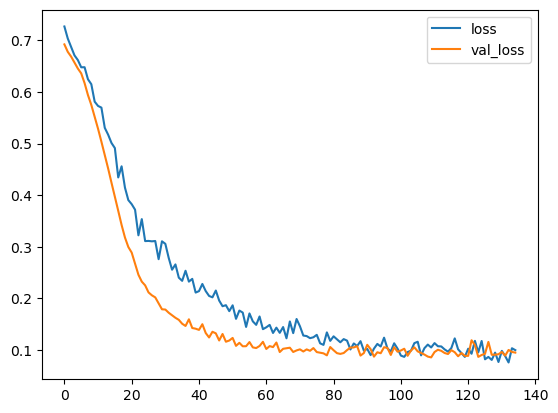

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

This is really good as both training loss and validation loss are decreasing and flatterning overtime

## Evaluation

In [47]:
predictions = model.predict_classes(X_test) # instead of predict(), we use predict_classes() for classification tasks

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 3 85]]
